# 텍스트 분석

## 필수 지식
- 텍스트는 숫자와 문자로 구성됩니다.
- 데이터 분석을 위해서 최대한 숫자화를 해야하는 메커니즘은 텍스트 분석에도 예외가 아닙니다.
- 텍스트에 포함된 숫자는 대부분 숫자로서가 아닌 문자로 인식해야 합니다.
- 결국, 텍스트를 숫자로 변경하기 위해서는 문자간 관계를 숫자로 변환하는 분석 기법 또는 문자의 빈도 기법을 사용합니다.

## 단어문서 행렬(TDM)
- Term Document Matrix

- 여러 문장을 단어로 구별하여 행렬로 구성
- 행렬로 구성함으로 선형대수를 이용한 다양한 수학적 연산이 가능함.

- 1번째 문장 : 오늘은 일찍 퇴근하겠다.
- 2번째 문장 : 내일도 일찍 퇴근하겠다.
- 3번째 문장 : 저녁 밥을 일찍 먹었지만 배가 고파 라면도 먹었다.
- 4번째 문장 : 퇴근 후에 영화를 보겠다.


|구분|오늘|일찍|퇴근|내일|저녁|밥|먹다|영화|보다|후에|배|고프다|라면|
|----|----|----|----|----|----|--|----|----|-----|---|----|-----|---|
|문장1|1|1|1|0|0|0|0|0|0|0|0|0|0|
|문장2|0|1|1|1|0|0|0|0|0|0|0|0|0|
|문장3|0|1|0|0|1|1|2|0|0|0|1|1|1|
|문장4|0|0|1|0|0|0|0|1|1|1|0|0|0|


- 어순 맥락의 무시, 문장길이가 길어짐에 따른 희소행렬화 현상

In [1]:
# 필수 패키지 로드
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer


- 분석 대상 데이터

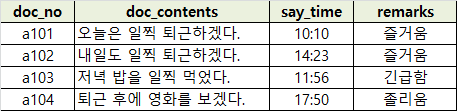

In [24]:
# 텍스트 분석과정에 집중하기 위하여 분석 대상 데이터에서 doc_contents 값만 대상으로 함.
data_list = ['오늘은 일찍 퇴근하겠다.',
             '내일도 일찍 퇴근하겠다.',
             '저녁 밥을 일찍 먹었다.',
             '퇴근 후에 영화를 보겠다.']

# 데이터 전처리 과정을 생략하고,
# 띄어쓰기 기준의 단어빈도수 세고, matrix 형태로 만들어주기
cv = CountVectorizer(max_features=5)
tdm = cv.fit_transform(data_list) # tdm 완성

In [25]:
# TDM 결과 확인 : 압축된 희소행렬로 생성
tdm

<4x5 sparse matrix of type '<class 'numpy.int64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [33]:
# 압축된 희소행렬을 numpy matrix 로 변환
tdm.todense()

matrix([[0, 0, 0, 1, 1],
        [1, 0, 0, 1, 1],
        [0, 1, 1, 1, 0],
        [0, 0, 0, 0, 0]])

In [48]:
# [참고] CountVectorizer 객체를 이용하여 TDM을 복원하면 문장에서 어떤 단어를 사용했는지 알 수 있음
cv.inverse_transform(tdm) # "오늘은"은 어디갔음 ?

[array(['일찍', '퇴근하겠다'], dtype='<U5'),
 array(['일찍', '퇴근하겠다', '내일도'], dtype='<U5'),
 array(['일찍', '밥을', '먹었다'], dtype='<U5'),
 array([], dtype='<U5')]

In [49]:
# [참고] fit() 한 후 CountVectorizer 객체를 이용하여 TDM을 복원하면 원래 문장에서 어떤 단어를 사용했는지 알 수 있음
cv.get_feature_names_out()

array(['내일도', '먹었다', '밥을', '일찍', '퇴근하겠다'], dtype=object)

In [51]:
# DataFrame 형태 변형
df = pd.DataFrame(tdm.todense(), columns=cv.get_feature_names_out())
df

,내일도,먹었다,밥을,일찍,퇴근하겠다
0,0,0,0,1,1
1,1,0,0,1,1
2,0,1,1,1,0
3,0,0,0,0,0


In [54]:
# 형태소 분석 패키지 로드
from kiwipiepy import Kiwi

In [55]:
# 형태소 분석 객체 생성
kiwi = Kiwi()

In [57]:
# 데이터 분석 대상의 doc_contents 값인 data_list의 각 문장에서 형태소를 분석한다.
new_data_list = []
for data in data_list:
    s = []
    for x in kiwi.tokenize(data): # 한글 토큰으로 분리
        if x.tag in ('NNG', 'MAG', 'VV'): # 토큰 중에 NNG(일반 명사), MAG(일반 부사), VV(동사) 만 분석하기 위하여 리스트형 변수 s에 저장
            s.append(x.form)
    new_data = ' '.join(s)  # 하나의 문장에서 분석에 필요한 일반 명사, 일반 부사, 동사 토큰만 저장한 리스트를 한 문장으로 변환
    new_data_list.append(new_data)
new_data_list

['오늘 일찍 퇴근', '내일 일찍 퇴근', '저녁 밥 일찍 먹', '퇴근 후 영화 보']

In [64]:
# 다시 TDM 생성과정 수행
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# 띄어쓰기 기준으로 단어빈도수 세고, matrix 형태로 만들어주기
cv = CountVectorizer(max_features=3) # 나머지 단어를 찾아라. ?
tdm = cv.fit_transform(new_data_list) # tdm 완성

# DataFrame 형태 변형
df = pd.DataFrame(tdm.todense(), columns = cv.get_feature_names_out())
df

,내일,일찍,퇴근
0,0,1,1
1,1,1,1
2,0,1,0
3,0,0,1


## 단어 및 역문서 빈도(TF-IDF)
- Term Frequency - Inverse Document Frequency

- 여러 문장을 단어로 구별하여 문서 내에서 얼마나 중요한 것인지를 나타내는 통계적 수치
- 단어의 빈도와 역 문서 빈도를 사용하여 DTM 단어의 중요도를 벡터화
  - 단어의 빈도 - tf(d, t) : 특정 문서 d에서 특정 단어 t의 등장 횟수
  - 문서의 빈도 - df(t) : 특정 단어 t가 등장한 문서의 수
  - 역 문서 빈도 - idf(t) : 문서의 빈도에 $log$와 같은 특정 식을 취함
  $$idf(d, t) = log({n \over 1+df(t)}) \\ n = sum \; of \; documents $$

In [66]:
# 필수 패키지 로드
from sklearn.feature_extraction.text import TfidfVectorizer

tfidfv = TfidfVectorizer() # tf-idf 객체 생성
tfidfv.fit(new_data_list) # 모든 문장을 대상으로 tfidf 통계정보 생성
tfidfv_array = tfidfv.transform(new_data_list) # 통계정보를 바탕으로 tfidf 데이터 생성
print(tfidfv_array.toarray())
print(tfidfv.vocabulary_)

[[0.         0.         0.74230628 0.47380449 0.         0.47380449]
 [0.74230628 0.         0.         0.47380449 0.         0.47380449]
 [0.         0.         0.         0.53802897 0.84292635 0.        ]
 [0.         0.84292635 0.         0.         0.         0.53802897]]
{'오늘': 2, '일찍': 3, '퇴근': 5, '내일': 0, '저녁': 4, '영화': 1}


In [68]:
# 분석의 편의성을 위하여 pandas 데이터프레임으로 변환
pd.DataFrame(tfidfv_array.toarray(), columns=tfidfv.vocabulary_)

,오늘,일찍,퇴근,내일,저녁,영화
0,0.000000,0.000000,0.742306,0.473804,0.000000,0.473804
1,0.742306,0.000000,0.000000,0.473804,0.000000,0.473804
2,0.000000,0.000000,0.000000,0.538029,0.842926,0.000000
3,0.000000,0.842926,0.000000,0.000000,0.000000,0.538029


## 텍스트 분류

### 자카드 유사도
- 두 집합의 합집합 갯수 중 교집합 갯수의 비율
- 비전문가도 일상에서 흔하게 생각하는 유사 측정식 또는 근접 거리도

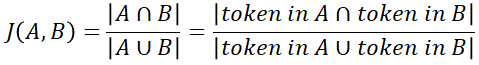

In [70]:
tokenized_doc1 = set(new_data_list[0].split(' ')) # 첫번째 문장을 공백 기준으로 단어화 (중복제거 효과)
tokenized_doc2 = set(new_data_list[1].split(' ')) # 두번째 문장을 공백 기준으로 단어화 (중복제거 효과)
print("문장 1의 집합 = ", tokenized_doc1)
print("문장 2의 집합 = ", tokenized_doc2)

# 단어의 합집합 (중복을 제거한 전체 단어들)
union = set(tokenized_doc1).union(set(tokenized_doc2))
print("합집합 = ", union)

# 단어의 교집합 (중복을 제거한 중복되는 단어들)
intersection = set(tokenized_doc1).intersection(set(tokenized_doc2))
print("교집합 = ", intersection)

# 자카드 유사도식에 의한 계산 (오류가 있다면 어떤게 있을까요 ?)
jaccardScore = len(intersection)/len(union)

print("자카드 유사도 = ", jaccardScore)

문장 1의 집합 =  {'일찍', '퇴근', '오늘'}
문장 2의 집합 =  {'일찍', '퇴근', '내일'}
합집합 =  {'오늘', '일찍', '퇴근', '내일'}
교집합 =  {'일찍', '퇴근'}
자카드 유사도 =  0.5


In [71]:
tokenized_doc1 = set(new_data_list[1].split(' ')) # 두번째 문장을 공백 기준으로 단어화 (중복제거 효과)
tokenized_doc2 = set(new_data_list[2].split(' ')) # 세번째 문장을 공백 기준으로 단어화 (중복제거 효과)
print("문장 2의 집합 = ", tokenized_doc1)
print("문장 3의 집합 = ", tokenized_doc2)

# 단어의 합집합 (중복을 제거한 전체 단어들)
union = set(tokenized_doc1).union(set(tokenized_doc2))
print("합집합 = ", union)

# 단어의 교집합 (중복을 제거한 중복되는 단어들)
intersection = set(tokenized_doc1).intersection(set(tokenized_doc2))
print("교집합 = ", intersection)

# 자카드 유사도식에 의한 계산 (오류가 있다면 어떤게 있을까요 ?)
jaccardScore = len(intersection)/len(union)

print("자카드 유사도 = ", jaccardScore)

문장 2의 집합 =  {'일찍', '퇴근', '내일'}
문장 3의 집합 =  {'일찍', '밥', '먹', '저녁'}
합집합 =  {'밥', '먹', '저녁', '일찍', '퇴근', '내일'}
교집합 =  {'일찍'}
자카드 유사도 =  0.16666666666666666


In [72]:
# 전체 문장를 대상으로 서로의 자카드 유사도 계산
for x in new_data_list:
    for y in new_data_list:
        if x == y: continue # 이 문장이 필요한 이유는 ?
        tokenized_doc1 = set(x.split(' '))
        tokenized_doc2 = set(y.split(' '))
        union = set(tokenized_doc1).union(set(tokenized_doc2))
        intersection = set(tokenized_doc1).intersection(set(tokenized_doc2))
        jaccardScore = len(intersection)/len(union)
        print(x, '/', y, 'Jaccard Score=', jaccardScore)


오늘 일찍 퇴근 / 내일 일찍 퇴근 Jaccard Score= 0.5
오늘 일찍 퇴근 / 저녁 밥 일찍 먹 Jaccard Score= 0.16666666666666666
오늘 일찍 퇴근 / 퇴근 후 영화 보 Jaccard Score= 0.16666666666666666
내일 일찍 퇴근 / 오늘 일찍 퇴근 Jaccard Score= 0.5
내일 일찍 퇴근 / 저녁 밥 일찍 먹 Jaccard Score= 0.16666666666666666
내일 일찍 퇴근 / 퇴근 후 영화 보 Jaccard Score= 0.16666666666666666
저녁 밥 일찍 먹 / 오늘 일찍 퇴근 Jaccard Score= 0.16666666666666666
저녁 밥 일찍 먹 / 내일 일찍 퇴근 Jaccard Score= 0.16666666666666666
저녁 밥 일찍 먹 / 퇴근 후 영화 보 Jaccard Score= 0.0
퇴근 후 영화 보 / 오늘 일찍 퇴근 Jaccard Score= 0.16666666666666666
퇴근 후 영화 보 / 내일 일찍 퇴근 Jaccard Score= 0.16666666666666666
퇴근 후 영화 보 / 저녁 밥 일찍 먹 Jaccard Score= 0.0


### 코사인 유사도
- 내적공간의 두 벡터간 각도의 코사인 값을 이용하여 측정

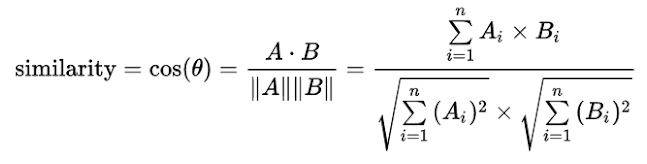

In [83]:
# 필수 패키지 로드
from sklearn.metrics.pairwise import cosine_similarity

# 코사인 유사도를 구해보자
# 첫번째 문장과 두번째 문장의 유사도(가까운 정도)를 계산
cosine_similarity(tfidfv_array[0:1], tfidfv_array[1:2])

array([[0.44898138]])

### 유클리디언 유사도 (L2 거리)
- 두 점 사이를 구하는 비현실적인 직선의 최단 거리를 유사도로 사용
- 두 점은 (x, y)의 2차원 평면일 수 있도 있고 n차원에 있을 수도 있다.

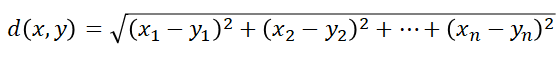

In [86]:
# 필수 패키지 로드
from sklearn.metrics.pairwise import euclidean_distances

# 유클리디언 유사도를 구해보자
# 첫번째 문장과 두번째 문장의 유사도(가까운 정도)를 계산
euclidean_distances(tfidfv_array[0:1], tfidfv_array[1:2])

array([[1.04977961]])

In [87]:
# 거리의 크기가 정해져 있지 않아 정규화를 반드시 수행해야 함.
tfidfv_array_scaled = tfidfv_array / np.sum(tfidfv_array)
tfidfv_array_scaled

<4x6 sparse matrix of type '<class 'numpy.float64'>'
	with 10 stored elements in Compressed Sparse Row format>

In [89]:
# 유클리디언 유사도 재계산
euclidean_distances(tfidfv_array_scaled[0], tfidfv_array_scaled[1])

array([[0.17092541]])

### 맨하탄 유사도 (L1 거리)
- 두 점 사이를 구하는 현실적인 거리를 감안한 최단 거리를 유사도로 사용
- 두 점은 (x, y)의 2차원 평면일 수 있도 있고 n차원에 있을 수도 있다.

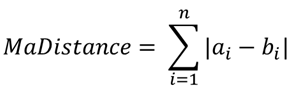

In [ ]:
# 필수 패키지 로드
from sklearn.metrics.pairwise import manhattan_distances

# 맨하탄 유사도를 구해보자
# 첫번째 문장과 두번째 문장의 유사도(가까운 정도)를 계산
manhattan_distances(tfidfv_array[0:1], tfidfv_array[1:2])

array([[1.48461257]])

In [90]:
# 필수 패키지 로드
from sklearn.metrics.pairwise import manhattan_distances

# 정규화된 데이터를 이용하여 맨하탄 유사도 재계산
manhattan_distances(tfidfv_array_scaled[0:1], tfidfv_array_scaled[1:2])

array([[0.24172503]])

## 텍스트 요약

- 추출적 요약 : 전체 문장에서 핵심 또는 높은 중요도 문장을 그대로 추출해서 요약글 생성(문장분류)
- 추상적 요약 : 새로운 단어와 새로운 문장을 생성해서 전체 문장의 의미를 요약글 생성(생성)

### TextRank Model

[PageRank 논문(1998) - The PageRank Citation Ranking: Bringing Order to the Web](http://ilpubs.stanford.edu:8090/422/1/1999-66.pdf)

- 예제 #1

In [1]:
# !pip install gensim==3.8.3
from gensim.summarization.summarizer import summarize

text = '''
안녕하세요.
오퐁님 1만 축하드려요. 이렇게 구독자 이벤트도 해주시고 감사드립니다. ㅎㅎ
항상 이렇게 성장하시는 모습을 보니 역시 꾸준함이 정답이다라는 걸 또 알고갑니다. ㅎㅎ
제가 원하는 컨테츠는 레벨마다 어떤 활동이 가능한지 어떤 수행능력이 따라와야 하는지 알려주시면 감사할꺼같아요.💪🏿
장비 이런건 다른 영상에서도 많이 접하지만 이렇게 하나하나 성장하는 브이로그를 하시는 걸 보면 세세하게 해주실꺼같아서요.
항상 응원해요👍🏿
'''

summarize(text)

'이렇게 구독자 이벤트도 해주시고 감사드립니다.'

- 예제 #2

In [3]:
from gensim.summarization.summarizer import summarize

text = '''
(서울=뉴스1) 박기현 기자 = 한국토지주택공사(LH)가 주택을 매입해 주거 취약계층에 공급하는 매입임대주택 가운데 6개월 이상 빈집(공가)인 경우가 5년 새 2.5배 이상 증가한 것으로 나타났다. 많은 매입임대주택이 실제로는 방치되고 있는 만큼 신중하게 매입해야 한다는 지적이 나온다.

13일 더불어민주당 장철민 의원실이 LH로부터 제출받은 '매입임대주택 현황'에 따르면 지난해 매입임대주택 공가는 4587가구에 달했다. 이는 5년 전인 2017년 1822가구 대비 2.5배 이상 증가한 수준이다.


전체 매입임대주택 재고량 가운데 공가가 차지하는 비중(공가율) 역시 같은 기간 2.2%에서 2.8%로 증가했다.

지역별로 공가율은 세종(16.3%)이 가장 높은 것으로 집계됐다. 그 밖에도 △충남(8.3%) △경북(6.1%) △부산(5.8%) △대전(4.4%) 등이 높았다.

장 의원은 "윤석열 정부에서 매입임대 공급을 확대하고 있지만 최근 매입임대주택의 공가율이 높아지고 있다"며 "건설경기 침체 국면에서 단기적 시장 대응에 급급할 게 아니라 실제 선호도가 높은 지역을 중심으로 다양하면서 장기적인 매입임대 정책을 고민할 필요가 있다"고 지적했다.

한편 정부는 매입임대주택 정책을 세밀하게 들여다볼 계획이다. 원희룡 국토교통부 장관은 지난 6일 <뉴스1>과 인터뷰에서 "매입임대는 원래 취지에 맞게 꾸준히 살 것"이라면서도 "다만 매입임대주택 미입주는 문제가 있다고 생각해 원인을 파악할 것”이라고 밝혔다.

실제로 건설업계는 미분양이 이어지고 있다며 건설사들의 줄도산을 막기 위해 정부가 미분양 주택을 매입해야 한다고 요구하고 있다. 지난해 12월 전국 미분양 주택 수는 6만8107가구로, 20년 장기평균선인 6만2000가구를 넘어 위험수치를 초과한 것으로 정부는 보고 있다.

masterki@news1.kr
'''

summarize(text)

'(서울=뉴스1) 박기현 기자 = 한국토지주택공사(LH)가 주택을 매입해 주거 취약계층에 공급하는 매입임대주택 가운데 6개월 이상 빈집(공가)인 경우가 5년 새 2.5배 이상 증가한 것으로 나타났다.\n지난해 12월 전국 미분양 주택 수는 6만8107가구로, 20년 장기평균선인 6만2000가구를 넘어 위험수치를 초과한 것으로 정부는 보고 있다.'

- 예제 #3

In [4]:
summarize(text, ratio=0.1)

'(서울=뉴스1) 박기현 기자 = 한국토지주택공사(LH)가 주택을 매입해 주거 취약계층에 공급하는 매입임대주택 가운데 6개월 이상 빈집(공가)인 경우가 5년 새 2.5배 이상 증가한 것으로 나타났다.'

- 예제 #4

In [6]:
summarize(text, ratio=0.01)

''

- 예제 #5

In [7]:
summarize(text, word_count=20)

'(서울=뉴스1) 박기현 기자 = 한국토지주택공사(LH)가 주택을 매입해 주거 취약계층에 공급하는 매입임대주택 가운데 6개월 이상 빈집(공가)인 경우가 5년 새 2.5배 이상 증가한 것으로 나타났다.'

### 머신러닝

- Seq2Seq 모델 : 대표적인 번역기 모델


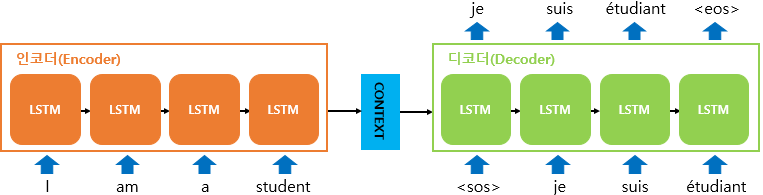

- 번역 훈련에 필요한 데이터 (x, y)

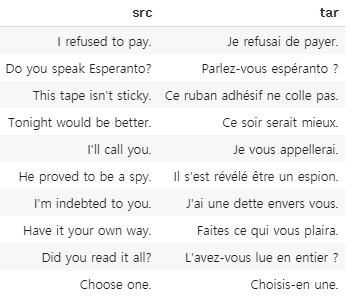

- 요약 훈련에 필요한 데이터(x, y)

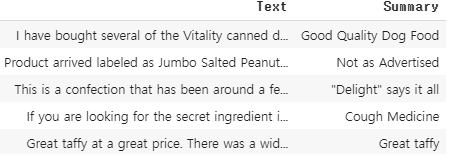

### chatGPT

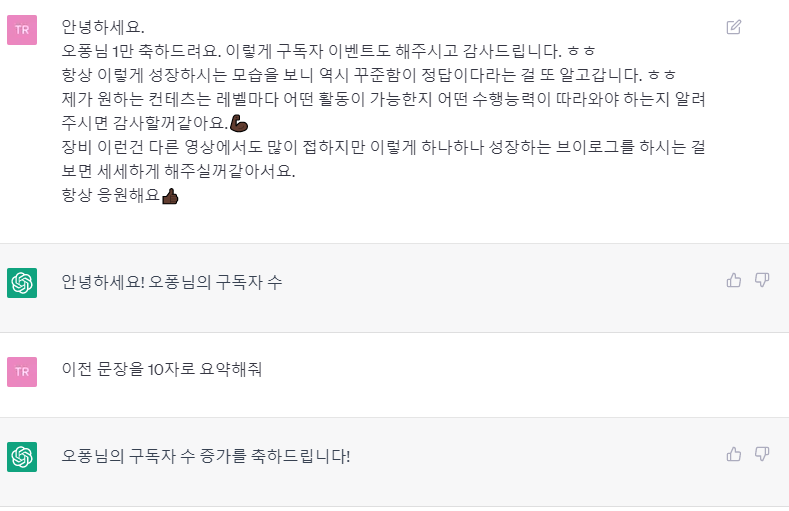

# 워드클라우드 시각화 (영문)

- 데이터 수집
- 데이터 준비 및 전처리
  - 토큰화 : 텍스트를 의미가 있는 여러 부분으로 분리 (뛰어쓰기 등)
  - 품사 태킹 :  토큰화된 텍스트에 문법적 태그를 할당
  - 구문 분석 : 토큰화된 단어와 문법 사이에 의미 있는 연결을 구축
  - 표제어 추출 : 단어를 사전 형식 또는 표제어로 단순화
  - 불용어 제거 : 의미적 맥락을 거의 또는 전혀 제공하지 않는 단어 제거
- 데이터 분석
- 시각화

In [9]:
# 필수 패키지 요약
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 영어 문자 전처리용 패키지 로드
import nltk
nltk.download("book")  # 예제 데이터 다운로드
from nltk.book import *

In [12]:
# 다운로드한 파일 확인
!ls -al /root/nltk_data

total 36
drwxr-xr-x  8 root root 4096 Apr 13 12:37 .
drwx------  1 root root 4096 Apr 13 12:37 ..
drwxr-xr-x  3 root root 4096 Apr 13 12:37 chunkers
drwxr-xr-x 31 root root 4096 Apr 13 12:37 corpora
drwxr-xr-x  3 root root 4096 Apr 13 12:37 grammars
drwxr-xr-x  3 root root 4096 Apr 13 12:37 help
drwxr-xr-x  5 root root 4096 Apr 13 12:37 taggers
drwxr-xr-x  3 root root 4096 Apr 13 12:37 tokenizers


In [ ]:
# 존 밀러의 실낙원(Paradise Lost) 원문 로드
emma_raw = nltk.corpus.gutenberg.raw("milton-paradise.txt")
print(emma_raw)

- 토큰 생성

In [16]:
# 문장 토큰화 (.)
from nltk.tokenize import sent_tokenize

tokens = sent_tokenize(emma_raw)

print(len(tokens))
print(tokens)

1835
["[Paradise Lost by John Milton 1667] \n \n \nBook I \n \n \nOf Man's first disobedience, and the fruit \nOf that forbidden tree whose mortal taste \nBrought death into the World, and all our woe, \nWith loss of Eden, till one greater Man \nRestore us, and regain the blissful seat, \nSing, Heavenly Muse, that, on the secret top \nOf Oreb, or of Sinai, didst inspire \nThat shepherd who first taught the chosen seed \nIn the beginning how the heavens and earth \nRose out of Chaos: or, if Sion hill \nDelight thee more, and Siloa's brook that flowed \nFast by the oracle of God, I thence \nInvoke thy aid to my adventurous song, \nThat with no middle flight intends to soar \nAbove th' Aonian mount, while it pursues \nThings unattempted yet in prose or rhyme.", "And chiefly thou, O Spirit, that dost prefer \nBefore all temples th' upright heart and pure, \nInstruct me, for thou know'st; thou from the first \nWast present, and, with mighty wings outspread, \nDove-like sat'st brooding on th

In [37]:
# 첫번째 토큰 미리보기
tokens[0]

"[Paradise Lost by John Milton 1667] \n \n \nBook I \n \n \nOf Man's first disobedience, and the fruit \nOf that forbidden tree whose mortal taste \nBrought death into the World, and all our woe, \nWith loss of Eden, till one greater Man \nRestore us, and regain the blissful seat, \nSing, Heavenly Muse, that, on the secret top \nOf Oreb, or of Sinai, didst inspire \nThat shepherd who first taught the chosen seed \nIn the beginning how the heavens and earth \nRose out of Chaos: or, if Sion hill \nDelight thee more, and Siloa's brook that flowed \nFast by the oracle of God, I thence \nInvoke thy aid to my adventurous song, \nThat with no middle flight intends to soar \nAbove th' Aonian mount, while it pursues \nThings unattempted yet in prose or rhyme."

In [18]:
# 두번째 토큰 미리보기
tokens[1]

"And chiefly thou, O Spirit, that dost prefer \nBefore all temples th' upright heart and pure, \nInstruct me, for thou know'st; thou from the first \nWast present, and, with mighty wings outspread, \nDove-like sat'st brooding on the vast Abyss, \nAnd mad'st it pregnant: what in me is dark \nIllumine, what is low raise and support; \nThat, to the height of this great argument, \nI may assert Eternal Providence, \nAnd justify the ways of God to men."

In [22]:
# 단어 토큰화 (공백, 특수문자 등)
from nltk.tokenize import word_tokenize

# 우선 100자만 단어 토큰화 수행
word_tokenize(emma_raw[0:100])

['[',
 'Paradise',
 'Lost',
 'by',
 'John',
 'Milton',
 '1667',
 ']',
 'Book',
 'I',
 'Of',
 'Man',
 "'s",
 'first',
 'disobedience',
 ',',
 'and',
 'the',
 'fruit',
 'Of']

- 형태소 분석
  - 어간 추출(stemming) : 접사 제거, 의미를 담은 핵심 추출
  - 표제어 추출(lemmatizing) : 기본 사전형 단어 추출 (am, are, is -> be)
  - 품사 부착(Part-Of-Speech tagging)

In [32]:
# 어간 추출
from nltk.stem import PorterStemmer, LancasterStemmer

st1 = PorterStemmer()
st2 =  LancasterStemmer()

words = ["disobedience", "disobedient", "disobediencing"]

print("Porter Stemmer   :", [st1.stem(w) for w in words])
print("Lancaster Stemmer:", [st2.stem(w) for w in words])

Porter Stemmer   : ['disobedi', 'disobedi', 'disobedienc']
Lancaster Stemmer: ['disobedy', 'disobedy', 'disobedy']


In [33]:
# 표제어 추출
from nltk.stem import WordNetLemmatizer

wnle = WordNetLemmatizer()

words = ["disobedience", "disobedient", "lives", 'are']

[wnle.lemmatize(w, pos="v") for w in words], [wnle.lemmatize(w) for w in words]

(['disobedience', 'disobedient', 'live', 'be'],
 ['disobedience', 'disobedient', 'life', 'are'])

In [40]:
# 품사 부착
from nltk.tag import pos_tag

# 문장 토큰화한 결과에서 첫번째 문장
sentence = tokens[0]

# 품사를 부착하고 5개 미리보기
wt = word_tokenize(sentence)
tagged_list = pos_tag(wt)
tagged_list[:5] # nltk.help.upenn_tagset()

[('[', 'JJ'),
 ('Paradise', 'NNP'),
 ('Lost', 'VBN'),
 ('by', 'IN'),
 ('John', 'NNP')]

- 전체 문장 토큰화 및 토큰별 사용 빈도 시각화

In [53]:
# 단어 토큰화를 위한 패키지 로드
from nltk import Text

# 전체 문장 단어 토큰화하여 Text 객체에 저장
text_tokens = Text(word_tokenize(emma_raw))
text_tokens[0:10]

['[', 'Paradise', 'Lost', 'by', 'John', 'Milton', '1667', ']', 'Book', 'I']

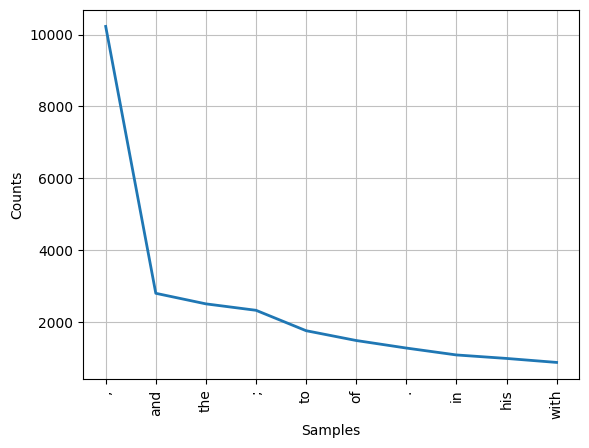

In [54]:
# 상위 10개 토큰의 출현수 시각화
text_tokens.plot(10)
plt.show()

In [52]:
# 토큰별 출현수
text_tokens.vocab()

FreqDist({',': 10228, 'and': 2799, 'the': 2505, ';': 2326, 'to': 1758, 'of': 1485, '.': 1275, 'in': 1083, 'his': 986, 'with': 875, ...})

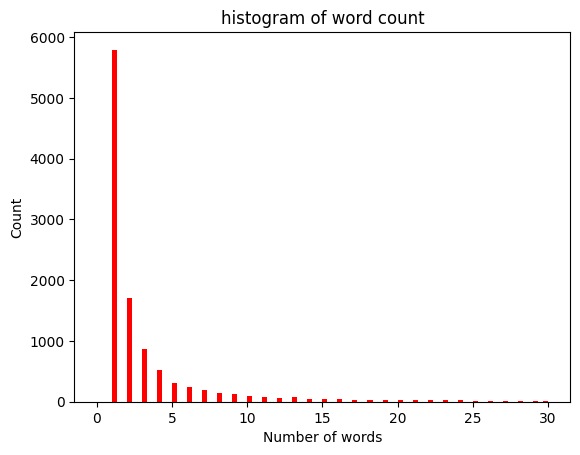

In [61]:
# 토큰별 출현수를 빈도로 구성하여 시각화
word_counts = text_tokens.vocab().values()

plt.hist(word_counts, bins=90, range=[0, 30], facecolor='r')
plt.title('histogram of word count')
plt.xlabel('Number of words')
plt.ylabel('Count')
plt.show()

- 워드 클라우드 시각화

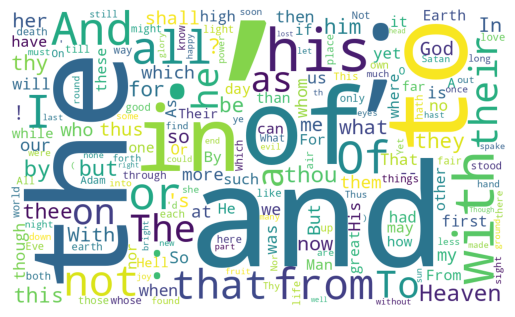

In [65]:
from wordcloud import WordCloud

wc = WordCloud(width=1000, height=600, background_color="white") # random_state=42
plt.imshow(wc.generate_from_frequencies(text_tokens.vocab()))
plt.axis("off")
plt.show()

# 워드클라우드 시각화 (한글)

In [66]:
# 필수 패키지 로드
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
# 데이터 불러오기
data = pd.read_csv('ratings.csv', sep='\t')
data = data[:1000]
data

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
...,...,...,...
995,10275296,미달이는.. 연예계를 바라보는 태도를 고쳐야 한다.,0
996,6473973,파괴된 관객들.,0
997,8417568,알콜중독자들 덕에 평점이 낮은가?,1
998,7126211,중견배우들이 만들어놓은 긴장감이 나름 긴장감있게 싸워보려했던 도술사들에 의해 헛웃음...,0


In [71]:
# 결측치 제거
data = data.dropna()

In [72]:
# 분석의 대상이 되는 컬럼 데이터만 추출
data_list = data['document'].values
len(data_list)

1000

In [77]:
# 영어 형태소 분석 패키지를 이용한 단어 토큰
from nltk.tokenize import word_tokenize

word_tokenize(data_list[0])

['아', '더빙', '..', '진짜', '짜증나네요', '목소리']

In [78]:
# 영어 형태소 분석 패키지를 이용한 전체 문장 토큰화
from nltk import Text

one_line_str_data = ''.join(data_list)
text_tokens = Text(word_tokenize(one_line_str_data))
text_tokens[0:10]

['아', '더빙', '..', '진짜', '짜증나네요', '목소리흠', '...', '포스터보고', '초딩영화줄', '....']

In [79]:
# 한글 형태소 분석 패키지 로드
from kiwipiepy import Kiwi
kiwi = Kiwi()

In [ ]:
# 데이터프레임에서 분석대상 문장 전체를 단어 토큰화
one_line_str_data = ''.join(data_list)
kiwi_data = kiwi.tokenize(one_line_str_data)
kiwi_data

In [ ]:
# 토큰의 갯수 파악을 위한 패키지 로드
from collections import Counter

# 분석 대상을 특정 품사로 제한하여 토큰 수집(재분류)
check_pummsa = ['NNG', 'NNP', 'VV', 'VA', 'XR', 'SL']
filter_result = [(token.form, token.tag) for token in kiwi_data if token.tag in check_pummsa]
token_count = Counter(filter_result) # 분석 대상 토큰의 빈도수 계산
token_count

In [ ]:
# 빈도가 많은 상위 100개 추출
top_100 = {}
for (morpheme, parts_of_speech), x_count in token_count.most_common(100):
    top_100[morpheme] = x_count

top_100

- 워드클라우드 시각화

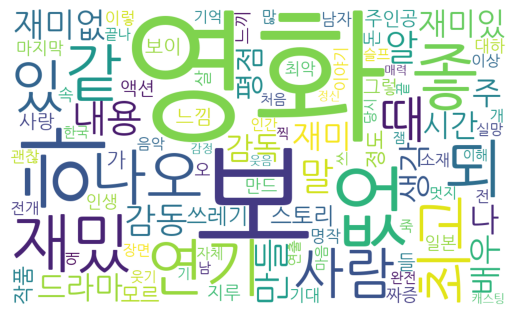

In [98]:
from wordcloud import WordCloud

font_path = '/content/NanumGothic.ttf'
wc = WordCloud(width=1000, height=600, background_color="white", font_path=font_path) # random_state=42
plt.imshow(wc.generate_from_frequencies(top_100))
plt.axis("off")
plt.show()

# 기말고사 안내

- 9~14주차 : 학습평가 문제 (20문제)
- 프로그램 개발 능력 평가 (10문제)
   - "프로그램 개발 능력 평가"를 위한 평가 프로그램은 공지사항 참고